In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mexico_final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    26582 non-null  int64  
 1   id                                            26582 non-null  int64  
 2   listing_url                                   26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_since                                    26582 non-null  object 
 5   host_response_time                            26582 non-null  object 
 6   host_response_rate                            26582 non-null  object 
 7   host_acceptance_rate                          26582 non-null  object 
 8   host_is_superhost                             26582 non-null  object 
 9   host_listings_count                           26582 non-null 

In [4]:
valores_nulos=df.isnull().sum()
valores_nulos

Unnamed: 0                                       0
id                                               0
listing_url                                      0
host_id                                          0
host_since                                       0
host_response_time                               0
host_response_rate                               0
host_acceptance_rate                             0
host_is_superhost                                0
host_listings_count                              0
host_total_listings_count                        0
host_verifications                               0
neighbourhood_cleansed                           0
latitude                                         0
longitude                                        0
property_type                                    0
room_type                                        0
accommodates                                     0
bathrooms                                        0
bathrooms_text                 

In [5]:
df_numerico = df.select_dtypes(include=['number'])
df_numerico

,Unnamed: 0,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,35797,153786,1,1,19.383820,-99.273340,2,1.0,1.0,...,4.70,4.80,4.80,4.80,4.70,1,1,0,0,1.70
1,1,44616,196253,12,13,19.411620,-99.177940,14,1.0,5.0,...,4.70,4.87,4.78,4.98,4.48,8,4,1,0,0.41
2,2,67703,334451,3,4,19.411520,-99.168570,4,1.0,2.0,...,4.75,4.94,4.92,4.98,4.91,2,2,0,0,0.31
3,3,70644,212109,3,4,19.356140,-99.163080,2,1.0,1.0,...,4.96,4.96,4.98,4.96,4.92,3,2,1,0,0.83
4,4,107078,540705,5,7,19.432110,-99.193270,2,1.5,1.0,...,5.00,5.00,4.73,4.91,4.82,3,3,0,0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,1252141718111439700,67472234,167,279,19.387329,-99.246731,4,1.0,2.0,...,NaN,4.80,4.80,4.80,4.70,37,14,23,0,1.70
26578,26578,1252159821531694005,596009321,16,16,19.432687,-99.197736,2,1.0,1.0,...,NaN,4.80,4.80,4.80,4.70,16,8,8,0,1.70
26579,26579,1252185591721328995,596009321,16,16,19.432687,-99.197736,2,1.0,1.0,...,NaN,4.80,4.80,4.80,4.70,16,8,8,0,1.70
26580,26580,1252218347521498445,596009321,16,16,19.432687,-99.197736,2,1.0,1.0,...,NaN,4.80,4.80,4.80,4.70,16,8,8,0,1.70


In [7]:
# Identificar columnas cuantitativas (numéricas) y cualitativas (categóricas)
cuantitativas = df.select_dtypes(include=['number'])
cualitativas = df.select_dtypes(exclude=['number'])

In [8]:
cuantitativas

,Unnamed: 0,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,35797,153786,1,1,19.383820,-99.273340,2,1.0,1.0,...,4.70,4.80,4.80,4.80,4.70,1,1,0,0,1.70
1,1,44616,196253,12,13,19.411620,-99.177940,14,1.0,5.0,...,4.70,4.87,4.78,4.98,4.48,8,4,1,0,0.41
2,2,67703,334451,3,4,19.411520,-99.168570,4,1.0,2.0,...,4.75,4.94,4.92,4.98,4.91,2,2,0,0,0.31
3,3,70644,212109,3,4,19.356140,-99.163080,2,1.0,1.0,...,4.96,4.96,4.98,4.96,4.92,3,2,1,0,0.83
4,4,107078,540705,5,7,19.432110,-99.193270,2,1.5,1.0,...,5.00,5.00,4.73,4.91,4.82,3,3,0,0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,1252141718111439700,67472234,167,279,19.387329,-99.246731,4,1.0,2.0,...,NaN,4.80,4.80,4.80,4.70,37,14,23,0,1.70
26578,26578,1252159821531694005,596009321,16,16,19.432687,-99.197736,2,1.0,1.0,...,NaN,4.80,4.80,4.80,4.70,16,8,8,0,1.70
26579,26579,1252185591721328995,596009321,16,16,19.432687,-99.197736,2,1.0,1.0,...,NaN,4.80,4.80,4.80,4.70,16,8,8,0,1.70
26580,26580,1252218347521498445,596009321,16,16,19.432687,-99.197736,2,1.0,1.0,...,NaN,4.80,4.80,4.80,4.70,16,8,8,0,1.70


In [9]:
cualitativas

,listing_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/35797,2010-06-28,a few days or more,0%,92%,f,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"[""Free parking on premises"", ""Washer"", ""Wifi"",...","$3,865.00",t,2011-11-09,2023-03-26,f
1,https://www.airbnb.com/rooms/44616,2010-08-09,within an hour,100%,93%,t,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"[""Iron"", ""Washer"", ""Wifi"", ""Host greets you"", ...",$120.00,t,2011-11-09,2023-03-26,f
2,https://www.airbnb.com/rooms/67703,2011-01-04,within an hour,71%,57%,t,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"[""Iron"", ""Wifi"", ""Bathtub"", ""Refrigerator"", ""D...","$2,029.00",t,2011-11-17,2024-05-05,f
3,https://www.airbnb.com/rooms/70644,2010-08-24,within a few hours,100%,100%,t,"['email', 'phone', 'work_email']",Coyoacán,Entire rental unit,Entire home/apt,1 bath,"[""Iron"", ""Washer"", ""Outdoor furniture"", ""Wifi""...","$1,140.00",t,2012-02-14,2024-09-22,f
4,https://www.airbnb.com/rooms/107078,2011-04-27,within an hour,100%,100%,t,"['email', 'phone']",Miguel Hidalgo,Entire loft,Entire home/apt,1.5 baths,"[""Iron"", ""Washer"", ""Outdoor furniture"", ""Wifi""...","$3,633.00",t,2016-05-30,2023-08-16,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,https://www.airbnb.com/rooms/1252141718111439700,2016-04-16,within an hour,100%,100%,t,"['email', 'phone']",Miguel Hidalgo,Private room in guesthouse,Private room,1 private bath,"[""Wifi"", ""Heating"", ""Freezer"", ""Cleaning avail...",$488.00,t,NaN,NaN,t
26578,https://www.airbnb.com/rooms/1252159821531694005,2024-08-13,within an hour,100%,100%,f,"['email', 'phone']",Miguel Hidalgo,Room in hotel,Private room,1 private bath,"[""Shared patio or balcony"", ""Iron"", ""Outdoor f...","$2,800.00",t,NaN,NaN,t
26579,https://www.airbnb.com/rooms/1252185591721328995,2024-08-13,within an hour,100%,100%,f,"['email', 'phone']",Miguel Hidalgo,Room in hotel,Private room,1 private bath,"[""Shared patio or balcony"", ""Iron"", ""Outdoor f...","$2,700.00",t,NaN,NaN,t
26580,https://www.airbnb.com/rooms/1252218347521498445,2024-08-13,within an hour,100%,100%,f,"['email', 'phone']",Miguel Hidalgo,Room in hotel,Private room,1 private bath,"[""Shared patio or balcony"", ""Iron"", ""Outdoor f...","$2,600.00",t,NaN,NaN,t


<Figure size 1500x800 with 0 Axes>

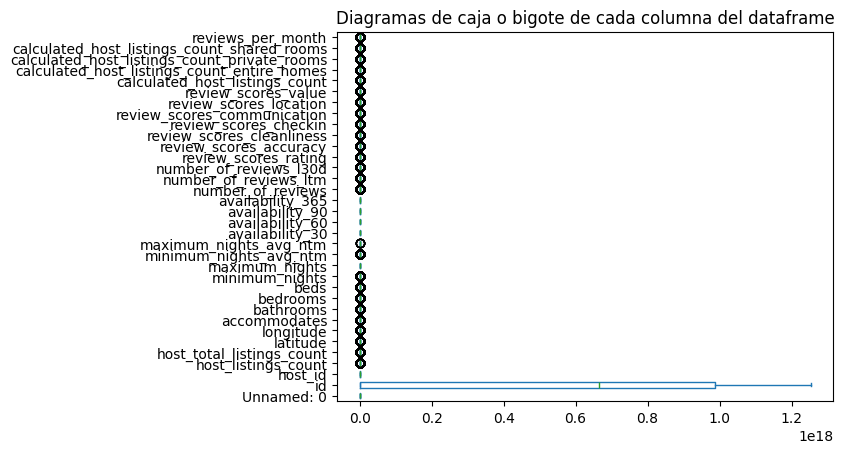

In [10]:
# Realizamos diagramas de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()

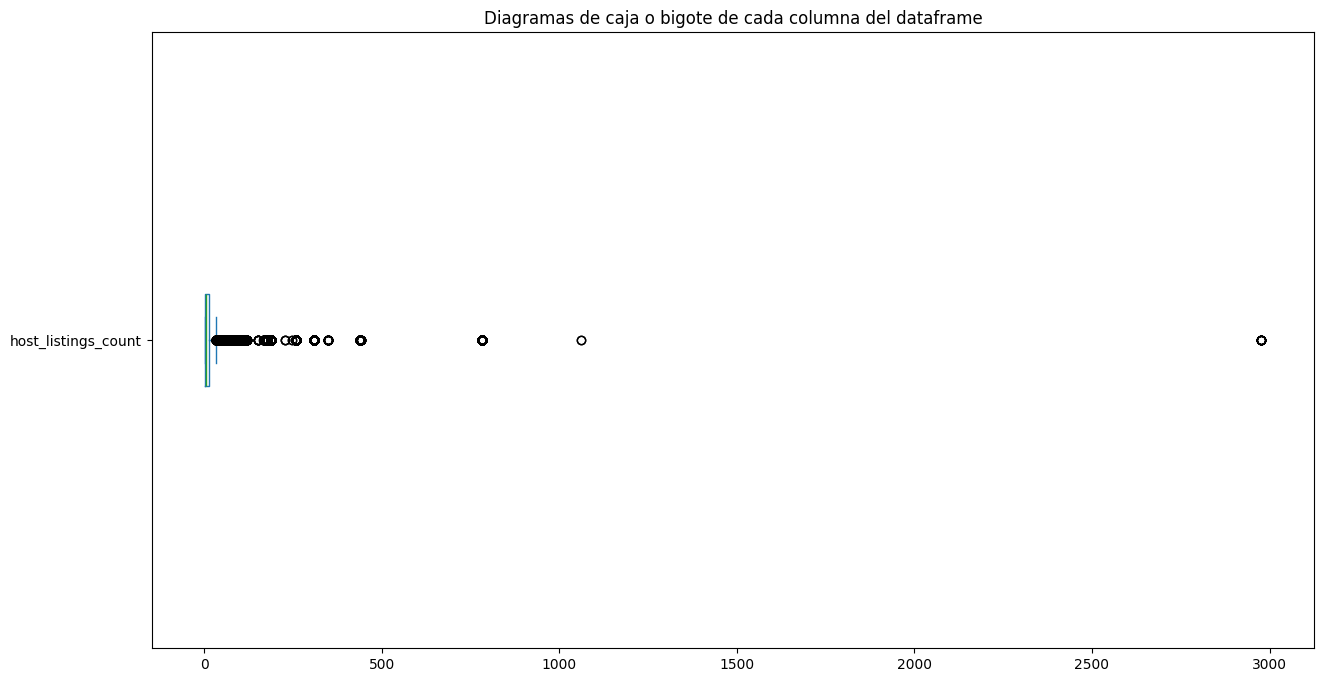

In [11]:
# Realizamos diagramas de caja o bigote para una columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas['host_listings_count'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe')
plt.show()

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINACIÓN DE OUTLIERS EN DATAFRAME**


In [12]:
#Método aplicando desviación estándar. Encuentro los valores extremos

y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Límite superior permitido", Limite_Superior)
print("Límite inferior permitido", Limite_Inferior)

Límite superior permitido Unnamed: 0                                      3.631162e+04
id                                              1.997574e+18
host_id                                         7.675833e+08
host_listings_count                             3.295566e+02
host_total_listings_count                       6.148874e+02
latitude                                        1.953289e+01
longitude                                      -9.906674e+01
accommodates                                    1.043010e+01
bathrooms                                       4.584733e+00
bedrooms                                        5.339414e+00
beds                                            6.985210e+00
minimum_nights                                  8.183006e+01
maximum_nights                                  1.793887e+03
minimum_nights_avg_ntm                          7.949662e+01
maximum_nights_avg_ntm                          2.102283e+03
availability_30                                 4.852387e+0

In [13]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
df1=cuantitativas [(y<=Limite_Superior)&(y>=Limite_Inferior)]
df1

,Unnamed: 0,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,35797,153786,1.0,1.0,19.383820,NaN,2.0,1.0,1.0,...,4.70,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,1,44616,196253,12.0,13.0,19.411620,-99.177940,NaN,1.0,5.0,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,2,67703,334451,3.0,4.0,19.411520,-99.168570,4.0,1.0,2.0,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,3,70644,212109,3.0,4.0,19.356140,-99.163080,2.0,1.0,1.0,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,4,107078,540705,5.0,7.0,19.432110,-99.193270,2.0,1.5,1.0,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,26577,1252141718111439700,67472234,167.0,279.0,19.387329,-99.246731,4.0,1.0,2.0,...,NaN,4.80,4.80,4.80,4.70,37.0,14.0,23.0,0.0,1.70
26578,26578,1252159821531694005,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,...,NaN,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,1.70
26579,26579,1252185591721328995,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,...,NaN,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,1.70
26580,26580,1252218347521498445,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,...,NaN,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,1.70


In [14]:
valores_nulos1= df1.isnull().sum()
valores_nulos1

Unnamed: 0                                        0
id                                                0
host_id                                           0
host_listings_count                             304
host_total_listings_count                       380
latitude                                        357
longitude                                       712
accommodates                                    526
bathrooms                                       309
bedrooms                                        286
beds                                            466
minimum_nights                                  190
maximum_nights                                    1
minimum_nights_avg_ntm                          184
maximum_nights_avg_ntm                            7
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_re

In [15]:
df_clean=df1.copy()
df_clean=df_clean.fillna(round(df1.mean(),1))
df_clean

valores_nulos=df_clean.isnull().sum().sum()
valores_nulos

np.int64(0)

In [16]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75

y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q1
iqr=percentile75-percentile25

Limite_Superior_iqr=percentile75 + 1.5*iqr
Limite_Inferior_iqr=percentile25 + 1.5*iqr

In [17]:
#Obtenemos datos limpios del Dataframe

df1_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df1_iqr

,Unnamed: 0,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,0.0,NaN
26578,NaN,NaN,596009321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,0.0,NaN
26579,NaN,NaN,596009321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,0.0,NaN
26580,NaN,NaN,596009321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,0.0,NaN


In [18]:
valores_nulos=df1_iqr.isnull().sum()
valores_nulos

Unnamed: 0                                      26581
id                                              26582
host_id                                         25056
host_listings_count                             24963
host_total_listings_count                       25060
latitude                                        25389
longitude                                       24313
accommodates                                    23096
bathrooms                                       24919
bedrooms                                        24643
beds                                            23748
minimum_nights                                  23676
maximum_nights                                  26581
minimum_nights_avg_ntm                          24970
maximum_nights_avg_ntm                          26581
availability_30                                 26582
availability_60                                 26582
availability_90                                 26582
availability_365            

In [19]:
valores_nulos=df1_iqr.isnull().sum().sum()
valores_nulos

np.int64(838385)

In [20]:
df_clean_iqr=df1.copy()
df_clean_iqr=df_clean.fillna(round(df1.mean(),1))
df_clean_iqr

valores_nulos=df_clean_iqr.isnull().sum().sum()
valores_nulos

np.int64(0)

In [21]:
#Union del dataframe cuantitativo con el cualitativo 

Datos_limpios = pd.concat([cualitativas, df_clean_iqr], axis=1)
Datos_limpios

,listing_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,neighbourhood_cleansed,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,2010-06-28,a few days or more,0%,92%,f,"['email', 'phone', 'work_email']",Cuajimalpa de Morelos,Entire villa,Entire home/apt,...,4.70,4.80,4.80,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,https://www.airbnb.com/rooms/44616,2010-08-09,within an hour,100%,93%,t,"['email', 'phone', 'work_email']",Cuauhtémoc,Entire home,Entire home/apt,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,https://www.airbnb.com/rooms/67703,2011-01-04,within an hour,71%,57%,t,"['email', 'phone']",Cuauhtémoc,Entire rental unit,Entire home/apt,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,2010-08-24,within a few hours,100%,100%,t,"['email', 'phone', 'work_email']",Coyoacán,Entire rental unit,Entire home/apt,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,https://www.airbnb.com/rooms/107078,2011-04-27,within an hour,100%,100%,t,"['email', 'phone']",Miguel Hidalgo,Entire loft,Entire home/apt,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,https://www.airbnb.com/rooms/1252141718111439700,2016-04-16,within an hour,100%,100%,t,"['email', 'phone']",Miguel Hidalgo,Private room in guesthouse,Private room,...,4.80,4.80,4.80,4.80,4.70,37.0,14.0,23.0,0.0,1.70
26578,https://www.airbnb.com/rooms/1252159821531694005,2024-08-13,within an hour,100%,100%,f,"['email', 'phone']",Miguel Hidalgo,Room in hotel,Private room,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,1.70
26579,https://www.airbnb.com/rooms/1252185591721328995,2024-08-13,within an hour,100%,100%,f,"['email', 'phone']",Miguel Hidalgo,Room in hotel,Private room,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,1.70
26580,https://www.airbnb.com/rooms/1252218347521498445,2024-08-13,within an hour,100%,100%,f,"['email', 'phone']",Miguel Hidalgo,Room in hotel,Private room,...,4.80,4.80,4.80,4.80,4.70,16.0,8.0,8.0,0.0,1.70


In [22]:
Datos_limpios.to_csv('Datos_Limpios_mexico_final.csv')